<a href="https://colab.research.google.com/github/CarlesG/Pytorch-curso/blob/main/Repaso_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

# Introducción 
Vamos a aplicar regresión lineal, utilizando el framework de Pytorch, utilizando para ello el modelo lineal. El ejemplo que vamos a utilizar es el mismo que se nos da en el notebook [aquí](https://jovian.ai/aakashns/02-linear-regression). Báásicamente los datos nos dan la infomación de las cosechas en diferentes localizaciones, de manzanas y naranjas, en función de las siguiente variables:
* Temperatura (F)
* Lluvia (mm)
* Humedad (%)

![imagen](https://i.imgur.com/6Ujttb4.png)
Los pasos que vamos a seguir para realizar la regresíon y obtener un modelo para predecir el resultado de las cosechas de estos dos cultivos, son los siguientes:



# 1. Preparación del dataset
Nos dan el dataset directamente con los arrays siguientes de numpy:


In [ ]:
# temp, rainfall , humidity

inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (manzanas, naranjas)

targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

Como podemos ver, tendremos variables de entrada, y objetivos, o variables de salida. Convertimos los arrays de numpy a tensores, para poder trabajar con pytorch. 

In [ ]:
# convertimos los arrays a tensores

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

Para poder acceder a los datos como tuplas, utilizamos la estructura `Datase`. Para cargar los batches de forma desordenada y aleatoria, y no pasarle a nuestro modelo todas las entradas a la vez, lo que se utiliza es el `Dataloader`. Si recorremos toda la tupla generada con Dataloader, recorreremos todo el dataset, pero con un tamaño de batch determinada y además, podemos agregarle la opción de barajar los inputs de forma aleatoria. Esto ayuda a la convergencia más rápida, al buscar el mínimo de la función de pérdidas.

In [ ]:
# cargamos las librerías para manipular el dataset

from torch.utils.data import TensorDataset, DataLoader
data_st = TensorDataset(inputs,targets)
data_ld = DataLoader(data_st, batch_size = 2, shuffle = True)

# 2. Generación del modelo
Generamos el modelo, con lo que ya se inicializaría aleatoriamente los pesos y las bias, de la siguiente forma

In [ ]:
# Generamos el modelo de predición

nn = torch.nn
model = nn.Linear(3,2) # Tenemos tres variables de entrada (temperatura, lluvia y humedad) y dos de salida (manzanas y naranjas)

# Para ver los parámetros del modelo

print(model)
print(model.weight)
print(model.bias)

list(model.parameters())

Linear(in_features=3, out_features=2, bias=True)
Parameter containing:
tensor([[-0.0709,  0.4900,  0.3618],
        [-0.4067,  0.5429,  0.1179]], requires_grad=True)
Parameter containing:
tensor([-0.4041,  0.3859], requires_grad=True)


[Parameter containing:
 tensor([[-0.0709,  0.4900,  0.3618],
         [-0.4067,  0.5429,  0.1179]], requires_grad=True),
 Parameter containing:
 tensor([-0.4041,  0.3859], requires_grad=True)]

# 3. Función de pérdidas
 Definimos la función de coste

In [ ]:
import torch.nn.functional as F

# Definimos la función de pérdidas
loss_fn = F.mse_loss

# Computamos
loss = loss_fn(model(inputs), targets)

# 4. Optimización por el gradiente descendente.
para iniciar el optimizador, tenemos que pasarle los parámetros a optimizar, es decir, los parámetros de nuestro modelo:


In [ ]:
learning_rate = 1e-5
opt = torch.optim.SGD(model.parameters(),learning_rate)

# 5. Entrenando el modelo

Una vez definidos todos los anteriores puntos, estamos listos para realizar el entrenamiento de nuestro modelo, para ello, realizamos la siguiente funcióón que realiza los siguientes pasos:
1. Generar la predicción. No es mas que propagar nuestro batch de entrada a través del modelo
2. Calcular la función de coste 
3. Computar los gradientes con la función `backward`
4. Actualizar los pesos.
5. Resetear los gradientes, para que no se acumulen en el grafo computacional.
6. Cada 10 epochs  mostrar el último valor actual de la función de pérdidas, mediante `loss.item`

In [ ]:
def entrenamiento(num_epochs, model, loss_fn, opt, data_ld):
  # Repetimos para un determinaod valor de epochs

  for epoch in range(num_epochs):
    
    for xb, yb in data_ld:
      
      pred = model(xb)
      loss = loss_fn(pred, yb)
      loss.backward()
      opt.step()
      opt.zero_grad()

    if (epoch+1) % 10 == 0: # cada múltiplo de diez nos muestra la siguiente info
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
      

Ahora podemos ejecutar la función, pasándole los parámetros establecidos en la función anterior:

In [ ]:
entrenamiento(1000, model, loss_fn, opt, data_ld)

Epoch [10/1000], Loss: 1.8888
Epoch [20/1000], Loss: 1.2489
Epoch [30/1000], Loss: 0.4635
Epoch [40/1000], Loss: 1.0289
Epoch [50/1000], Loss: 0.9051
Epoch [60/1000], Loss: 0.2392
Epoch [70/1000], Loss: 0.7564
Epoch [80/1000], Loss: 2.2954
Epoch [90/1000], Loss: 0.8743
Epoch [100/1000], Loss: 1.0672
Epoch [110/1000], Loss: 3.2474
Epoch [120/1000], Loss: 0.7065
Epoch [130/1000], Loss: 1.2559
Epoch [140/1000], Loss: 1.2346
Epoch [150/1000], Loss: 0.6092
Epoch [160/1000], Loss: 0.8065
Epoch [170/1000], Loss: 0.3479
Epoch [180/1000], Loss: 0.9170
Epoch [190/1000], Loss: 1.4035
Epoch [200/1000], Loss: 3.1563
Epoch [210/1000], Loss: 0.5810
Epoch [220/1000], Loss: 0.8134
Epoch [230/1000], Loss: 3.2895
Epoch [240/1000], Loss: 1.4747
Epoch [250/1000], Loss: 0.6903
Epoch [260/1000], Loss: 1.1985
Epoch [270/1000], Loss: 1.1866
Epoch [280/1000], Loss: 0.9826
Epoch [290/1000], Loss: 0.5706
Epoch [300/1000], Loss: 0.7335
Epoch [310/1000], Loss: 2.8313
Epoch [320/1000], Loss: 1.0321
Epoch [330/1000],

Comparamos la salida predecida con la salida que sabemos que tiene que dar:

In [ ]:
pred = model(inputs)
pred

tensor([[ 56.9722,  70.5138],
        [ 82.1872, 100.5663],
        [118.3084, 132.8717],
        [ 20.9482,  37.8018],
        [101.9382, 118.5739],
        [ 55.7300,  69.4324],
        [ 82.0470, 100.6594],
        [118.6099, 133.4688],
        [ 22.1903,  38.8832],
        [103.0402, 119.7484],
        [ 56.8320,  70.6068],
        [ 80.9451,  99.4849],
        [118.4486, 132.7786],
        [ 19.8462,  36.6274],
        [103.1804, 119.6553]], grad_fn=<AddmmBackward>)

In [ ]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

# Predecir otras salidas 

In [ ]:
model(torch.tensor([75., 63., 44.]))

tensor([53.5056, 67.6513], grad_fn=<AddBackward0>)

# Otros ejemplos
## Regresión cuadrática o polinomial
Vamos a suponer que tenemos los siguientes puntos, que se parecen a una función cuadrática, de la forma $f(x) = w_0 + w_1 x + w_2 x^2$:




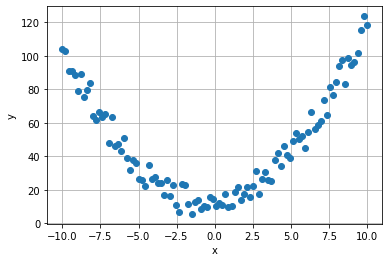

In [19]:
# Creamos el dataset de los puntos:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-10,10,100)
y = x**2 + 0.7 * x + 3.0 + 20 * np.random.rand(len(x))  

plt.plot(x,y,'o')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Tenemos que crear el set de entrenamiento, para ello, realizamos lo siguiente:


In [38]:
# Generamos los coeficientes del polinomio
x_train = torch.FloatTensor([[xval ** 2, xval ** 1, 1] for xval in x])
y_train = torch.FloatTensor(y)
# lo convertimos a columna
y_train = y_train.view(100,-1)
y_train.shape

torch.Size([100, 1])